# Plotting results

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

path = os.path.join(os.getcwd(), "data")

## LiH with exact labels
Plot the results for the VQLM and siVQLM trained on exact energy labels.

In [2]:
def plot_LiH_exact(
        QNN_E_pred, EQNN_E_pred, QNN_energy, EQNN_energy, QNN_E_std, EQNN_E_std,
        QNN_F_pred, EQNN_F_pred, QNN_forces, EQNN_forces, QNN_F_std, EQNN_F_std,
        r_QNN, r_EQNN, QNN_batch, QNN_batch_outliers, EQNN_batch
        ):
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[4.5,4.5])
        
    # Energy
    axs[0].errorbar(r_EQNN[EQNN_batch], EQNN_E_pred[EQNN_batch], yerr=EQNN_E_std[EQNN_batch], capsize=3, fmt="b.", ecolor = "b", elinewidth=0.5, label='siVQLM')
    axs[0].errorbar(r_QNN[QNN_batch], QNN_E_pred[QNN_batch], yerr=QNN_E_std[QNN_batch], capsize=3, fmt="r.", ecolor = "r", elinewidth=0.5, label='VQLM')
    axs[0].errorbar(r_QNN[QNN_batch_outliers], QNN_E_pred[QNN_batch_outliers], yerr=QNN_E_std[QNN_batch_outliers], capsize=3, fmt='ro', mfc='none',  ecolor = "r", elinewidth=0.5, label='Outliers (VQLM)')
    axs[0].plot(r_QNN[2:len(r_QNN)//2], QNN_energy[2:len(r_QNN)//2], 'k-', lw=1, label='Exact')
    
    axs[0].set_xlabel('Reference energy (eV)')
    axs[0].set_ylabel('Predicted energy (eV)')
    axs[0].legend()
    
    # Forces
    axs[1].errorbar(EQNN_forces[EQNN_batch].reshape(-1), EQNN_F_pred[EQNN_batch].reshape(-1), yerr=EQNN_F_std[EQNN_batch].reshape(-1), capsize=3, fmt="b.", ecolor = "b", elinewidth=0.5, label='siVQLM')
    axs[1].errorbar(-QNN_forces[QNN_batch].reshape(-1), -QNN_F_pred[QNN_batch].reshape(-1), yerr=QNN_F_std[QNN_batch].reshape(-1), capsize=3, fmt="r.", ecolor = "r", elinewidth=0.5, label='VQLM')
    axs[1].errorbar(-QNN_forces[QNN_batch_outliers].reshape(-1), -QNN_F_pred[QNN_batch_outliers].reshape(-1), yerr=QNN_F_std[QNN_batch_outliers].reshape(-1), capsize=3, fmt='ro', mfc='none',  ecolor = "r", elinewidth=0.5, label='Outliers (VQLM)')
    axs[1].plot(np.linspace(-11,11,100), np.linspace(-11,11,100), 'k-', lw=1, label='Exact')
    
    axs[1].set_xlabel('Reference forces (eV/$\AA$)')
    axs[1].set_ylabel('Predicted forces (eV/$\AA$)')
    axs[1].set_xlim(-11, 12)
        
    fig.tight_layout()
    plt.show()

In [3]:
# Load the data
with open(os.path.join(path, "LiH_exact_data.pkl"), 'rb') as fp:
    data = pickle.load(fp)

    E_mean_EQNN = data["E_mean_EQNN"]
    E_mean_QNN = data["E_mean_QNN"]
    E_std_EQNN = data["E_std_EQNN"]
    E_std_QNN = data["E_std_QNN"] 
    energy_exact_EQNN = data["energy_exact_EQNN"]
    energy_exact_QNN = data["energy_exact_QNN"]

    F_mean_EQNN = data["F_mean_EQNN"]
    F_mean_QNN = data["F_mean_QNN"]
    F_std_EQNN = data["F_std_EQNN"]
    F_std_QNN = data["F_std_QNN"]
    forces_exact_EQNN = data["forces_exact_EQNN"]
    forces_exact_QNN = data["forces_exact_QNN"]

    r_EQNN = data["r_EQNN"]
    r_QNN = data["r_QNN"]
    
    test_batch_EQNN = data["test_batch_EQNN"]
    test_batch_QNN = data["test_batch_QNN"]
    test_batch_QNN_outliers = data["test_batch_QNN_outliers"]
    training_batch_EQNN = data["training_batch_EQNN"]
    training_batch_QNN = data["training_batch_QNN"]

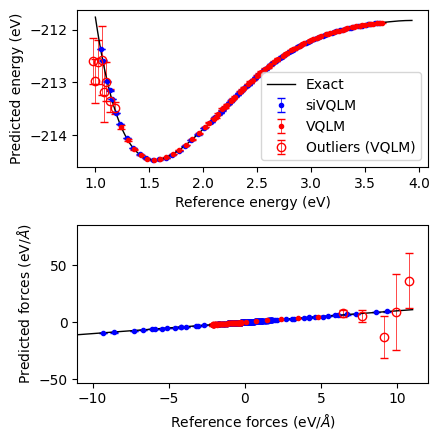

In [4]:
_ = plot_LiH_exact(
    E_mean_QNN, E_mean_EQNN, energy_exact_QNN, energy_exact_EQNN, E_std_QNN, E_std_EQNN,
    F_mean_QNN, F_mean_EQNN, forces_exact_QNN, forces_exact_EQNN, F_std_QNN, F_std_EQNN,
    r_QNN, r_EQNN, test_batch_QNN, test_batch_QNN_outliers, test_batch_EQNN
    )

# LiH on noisy labels
Plot the results for the VQLM and siVQLM trained on noisy energy labels.

In [5]:
def plot_LiH_noisy(
    E_mean_EQNN, E_mean_QNN, E_std_EQNN, E_std_QNN, 
    F_mean_EQNN, F_mean_QNN, F_std_EQNN, F_std_QNN, 
    noise
    ):

    fig, axs = plt.subplots(sharex=True, nrows=2, ncols=1, figsize=[4.5,4.5])
        
    # Energy
    axs[0].errorbar(noise, E_mean_QNN, yerr=E_std_QNN, capsize=3, fmt="k.--", ecolor = "k", elinewidth=0.5, label='Energy (VQLM)')
    axs[0].errorbar(noise, E_mean_EQNN, yerr=E_std_EQNN, capsize=3, fmt="kv--", ecolor = "k", elinewidth=0.5, label='Energy (siVQLM)')
    
    axs[0].set_ylabel('MSE($E$) (eV$^2$)')
    #axs[0].set_xticks([])
    
    # Forces
    axs[1].errorbar(noise, F_mean_QNN, yerr=F_std_QNN, capsize=3, fmt="b.--", ecolor = "b", elinewidth=0.5, label='Forces (VQLM)')
    axs[1].errorbar(noise, F_mean_EQNN, yerr=F_std_EQNN, capsize=3, fmt="bv--", ecolor = "b", elinewidth=0.5, label='Forces (siVQLM)')
    
    axs[1].set_xlabel('$E_{std} (\%)$')
    axs[1].set_ylabel('MSE($F$) (eV$^2 \AA^{-2}$)')

    for ax in axs:
        ax.legend()
        ax.set_yscale('log')
        
    fig.tight_layout()
    plt.show()

In [6]:
# Load the data
with open(os.path.join(path, "LiH_noisy_data.pkl"), 'rb') as fp:
    data = pickle.load(fp)
    
    E_mean_EQNN = data["E_mean_EQNN"]
    E_mean_QNN = data["E_mean_QNN"]
    E_std_EQNN = data["E_std_EQNN"]
    E_std_QNN = data["E_std_QNN"] 
    
    F_mean_EQNN = data["F_mean_EQNN"]
    F_mean_QNN = data["F_mean_QNN"]
    F_std_EQNN = data["F_std_EQNN"]
    F_std_QNN = data["F_std_QNN"]
    
    noise = data["noise"]

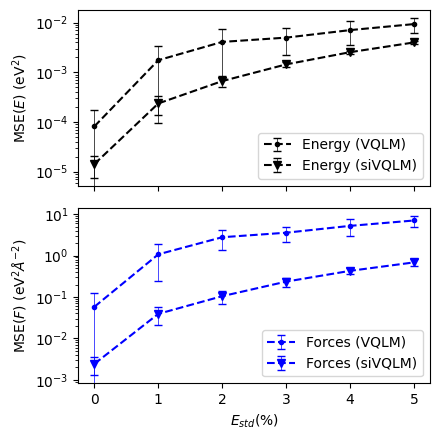

In [7]:
_ = plot_LiH_noisy(
    E_mean_EQNN, E_mean_QNN, E_std_EQNN, E_std_QNN, 
    F_mean_EQNN, F_mean_QNN, F_std_EQNN, F_std_QNN, 
    noise)

## H2O
Plot the results for the VQLM and siVQLM trained on exact energy labels.

In [8]:
def plot_H2O(
        QNN_E_pred=None, EQNN_E_pred=None, QNN_energy=None, EQNN_energy=None, QNN_E_std=None, EQNN_E_std=None,
        QNN_F_pred=None, EQNN_F_pred=None, QNN_forces=None, EQNN_forces=None, QNN_F_std=None, EQNN_F_std=None
        ):
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[4.5,4.5])
        
    # Energy
    axs[0].errorbar(QNN_energy, QNN_E_pred, yerr=QNN_E_std, capsize=3, fmt="r.", ecolor = "r", elinewidth=0.5, label='VQLM')
    axs[0].errorbar(EQNN_energy, EQNN_E_pred, yerr=EQNN_E_std, capsize=3, fmt="b.", ecolor = "b", elinewidth=0.5, label='siVQLM (no SB)')
    axs[0].plot(EQNN_energy,EQNN_energy, 'k-', lw=1, label='Exact')
    
    axs[0].set_xlabel('Reference energy (eV)')
    axs[0].set_ylabel('Predicted energy (eV)')
    axs[0].legend()
    
    # Forces
    axs[1].errorbar(QNN_forces.reshape(-1), QNN_F_pred.reshape(-1), yerr=QNN_F_std.reshape(-1), capsize=3, fmt="r.", ecolor = "r", elinewidth=0.5)
    axs[1].errorbar(EQNN_forces.reshape(-1), EQNN_F_pred.reshape(-1), yerr=EQNN_F_std.reshape(-1), capsize=3, fmt="b.", ecolor = "b", elinewidth=0.5)
    axs[1].plot(EQNN_forces.reshape(-1), EQNN_F_pred.reshape(-1), "b.",zorder=10)
    axs[1].plot(np.linspace(-3.,3.,100), np.linspace(-3.,3.,100), 'k-', lw=1)
    
    axs[1].set_xlabel('Reference forces (eV/$\AA$)')
    axs[1].set_ylabel('Predicted forces (eV/$\AA$)')
        
    fig.tight_layout()
    plt.show()

In [9]:
# Load the data
with open(os.path.join(path, "H2O_data.pkl"), 'rb') as fp:
    data = pickle.load(fp)
    QNN_E_pred = data["QNN_E_pred"]
    EQNN_E_pred = data["EQNN_E_pred"]
    QNN_energy = data["QNN_energy"]
    EQNN_energy = data["EQNN_energy"]
    QNN_E_std = data["QNN_E_std"] 
    EQNN_E_std = data["EQNN_E_std"]
    QNN_F_pred = data["QNN_F_pred"]
    EQNN_F_pred = data["EQNN_F_pred"]
    QNN_forces = data["QNN_forces"]
    EQNN_forces = data["EQNN_forces"]
    QNN_F_std = data["QNN_F_std"]
    EQNN_F_std = data["EQNN_F_std"]

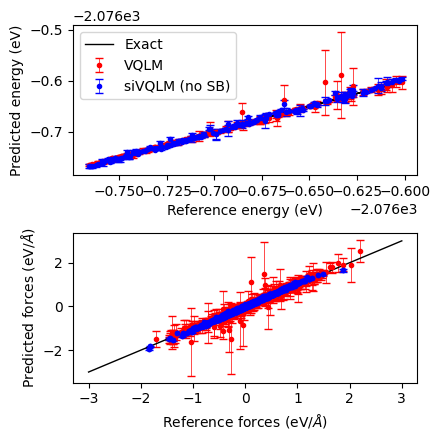

In [10]:
_ = plot_H2O(
    QNN_E_pred=QNN_E_pred, EQNN_E_pred=EQNN_E_pred,
    QNN_energy=QNN_energy, EQNN_energy=EQNN_energy, 
    QNN_E_std=QNN_E_std, EQNN_E_std=EQNN_E_std,
    QNN_F_pred=QNN_F_pred, EQNN_F_pred=EQNN_F_pred, 
    QNN_forces=QNN_forces, EQNN_forces=EQNN_forces, 
    QNN_F_std=QNN_F_std, EQNN_F_std=EQNN_F_std
    )

## H2O dimer energy

In [11]:
def plot_two_H2O(
        E_exact, E_mean, E_std
        ):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4.5,2.5])
    ax.errorbar(E_exact, E_mean, yerr=E_std, capsize=3, fmt="b.", ecolor = "b", elinewidth=0.5)
    ax.plot(E_exact,E_exact, 'k-', lw=1, label='Exact')
    ax.set_xlabel('Reference energy (eV)')
    ax.set_ylabel('Predicted energy (eV)')
    ax.legend()
    fig.tight_layout()
    plt.show()

In [12]:
# Load the data
with open(os.path.join(path, "H2O_dimer_data.pkl"), 'rb') as fp:
    data = pickle.load(fp)
    E_exact = data["E_exact"]
    E_mean = data["E_mean"]
    E_std = data["E_std"]

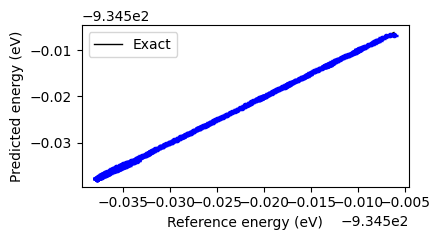

In [13]:
_ = plot_two_H2O(
    E_exact, E_mean, E_std
    )

## H2O dimer 1D cut
Plot the results for a 1D cut of a water dimer to compare training on energy labels and training on energy labels and force labels.

In [14]:
def plot_two_H2O_1d(
        E_exact_1, E_mean_1, E_std_1, E_exact_2, E_mean_2, E_std_2,
        F_exact_1, F_mean_1, F_std_1, F_exact_2, F_mean_2, F_std_2
        ):
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[4.5,4.5])
        
    # Energy
    ax[0].errorbar(E_exact_1, E_mean_1, yerr=E_std_1, capsize=3, fmt="b.", ecolor = "b", 
                   elinewidth=0.5, label='MSE(E)+MSE(F)')
    ax[0].errorbar(E_exact_2, E_mean_2, yerr=E_std_2, capsize=3, fmt="r.", ecolor = "r", 
                   elinewidth=0.5, label='MSE(E)')
    ax[0].plot(E_exact_1,E_exact_1, 'k-', lw=1, label='Identity')
    
    ax[0].set_xlabel('Reference energy (eV)')
    ax[0].set_ylabel('Predicted energy (eV)')
    ax[0].legend()

    ax[1].errorbar(F_exact_1.reshape(-1), F_mean_1.reshape(-1), yerr=F_std_1.reshape(-1), capsize=3, 
                   fmt="b.", ecolor = "b", elinewidth=0.5)
    ax[1].errorbar(F_exact_2.reshape(-1), F_mean_2.reshape(-1), yerr=F_std_2.reshape(-1), capsize=3, 
                   fmt="r.", ecolor = "r", elinewidth=0.5)
    ax[1].plot(F_exact_1,F_exact_1, 'k-', lw=1, label='Exact')
    
    ax[1].set_xlabel('Reference forces (eV)')
    ax[1].set_ylabel('Predicted forces (eV)')
    ax[1].legend()

    fig.tight_layout()
    plt.show()

In [15]:
# Load the data
with open(os.path.join(path, "H2O_dimer_1d_with_F_data.pkl"), 'rb') as fp:
    data = pickle.load(fp)
    E_exact_1d_with_F = data["E_exact_1d_with_F"]
    F_exact_1d_with_F = data["F_exact_1d_with_F"]
    E_mean_1d_with_F = data["E_mean_1d_with_F"]
    E_std_1d_with_F = data["E_std_1d_with_F"]
    F_mean_1d_with_F = data["F_mean_1d_with_F"]
    F_std_1d_with_F = data["F_std_1d_with_F"]

with open(os.path.join(path, "H2O_dimer_1d_without_F_data.pkl"), 'rb') as fp:
    data = pickle.load(fp)
    E_exact_1d_without_F = data["E_exact_1d_without_F"]
    F_exact_1d_without_F = data["F_exact_1d_without_F"]
    E_mean_1d_without_F = data["E_mean_1d_without_F"]
    E_std_1d_without_F = data["E_std_1d_without_F"]
    F_mean_1d_without_F = data["F_mean_1d_without_F"]
    F_std_1d_without_F = data["F_std_1d_without_F"]

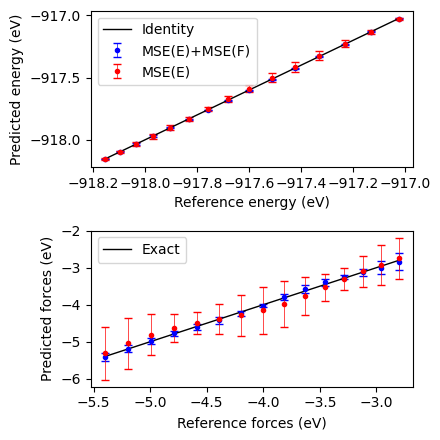

In [16]:
_ = plot_two_H2O_1d(
    E_exact_1d_with_F, E_mean_1d_with_F, E_std_1d_with_F,
    E_exact_1d_without_F, E_mean_1d_without_F, E_std_1d_without_F,
    F_exact_1d_with_F, F_mean_1d_with_F, F_std_1d_with_F,
    F_exact_1d_without_F, F_mean_1d_without_F, F_std_1d_without_F
    )